# Problem 2 — Contrast of Image Patches (60 points)

For this problem, refer to the example of using image patches.  
**Part E carries 40 points. Parts A–D share the remaining points evenly.**

---

## Part A — Minimum Non-Zero Contrast (8-bit Grayscale)
Create an example image that demonstrates the **minimum non-zero contrast** for an 8-bit grayscale image.

---

## Part B — Maximum Contrast (8-bit Grayscale)
Create an example image that demonstrates the **maximum contrast** for an 8-bit grayscale image.

---

## Part C — Constant Patch Image
Create an 8-bit grayscale image with:
- zero background
- constant square patches with values:5, 10, 100, 200, 250


---

## Part D — Logarithmic Transformation

Apply the logarithmic intensity transform:

$$
I_{out} = \log(1 + C \cdot I)
$$

for different values of **C**.

Discuss how the **visibility of the patches changes** as C varies.

---

## Part E — Side-by-Side Comparison and Visibility Table

Place the images from **Part C** and **Part D** side-by-side for: C = 1, 5, 10, 100


### Visibility Ranking Table

Create a table with:
- rows = C values
- columns = patch values

| C value | 5 | 10 | 100 | 200 | 250 |
|---------|---|----|-----|-----|-----|
| 1       |   |    |     |     |     |
| 5       |   |    |     |     |     |
| 10      |   |    |     |     |     |
| 100     |   |    |     |     |     |

### Scoring Rule

- **0** = not visible  
- **1** = worst visibility among C values  
- **2** = second worst  
- **3** = medium  
- **4** = second best  
- **5** = best visibility  

Provide a **brief justification** for how the scores were chosen.

---

## Note

Against a zero background, each patch has **unit local contrast** (verify).  
However, perceived visibility varies depending on:
- relative intensity
- patch size
- position
- chosen value of C




**Problem 2**


Saved: MinContrast.png


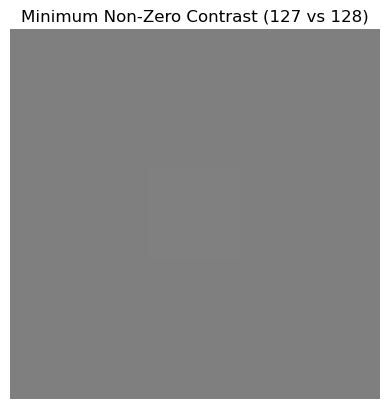

Saved: MaxContrast.png


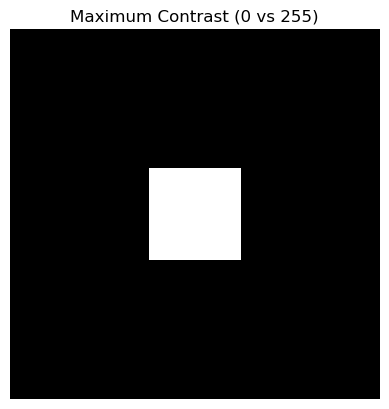

Saved: Patches.png


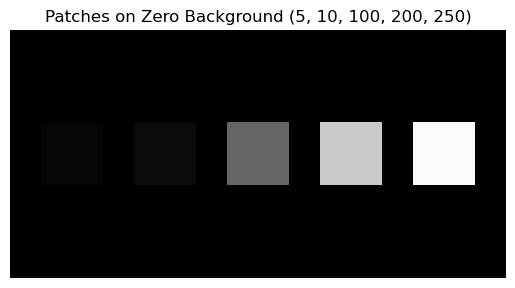

Saved: PartD_Log_C1.png


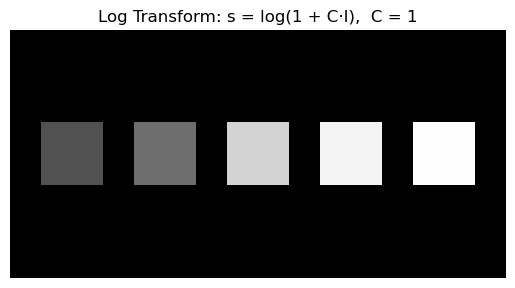

Saved: PartD_Log_C5.png


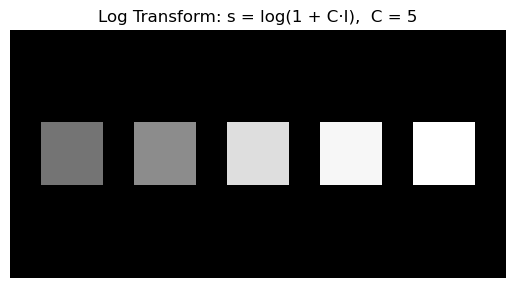

Saved: PartD_Log_C10.png


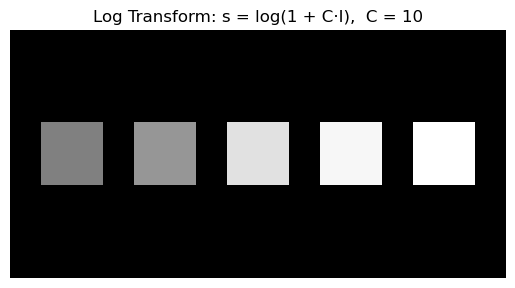

Saved: PartD_Log_C100.png


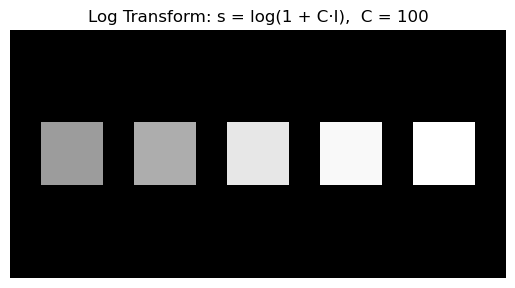

Saved: vis_score.png


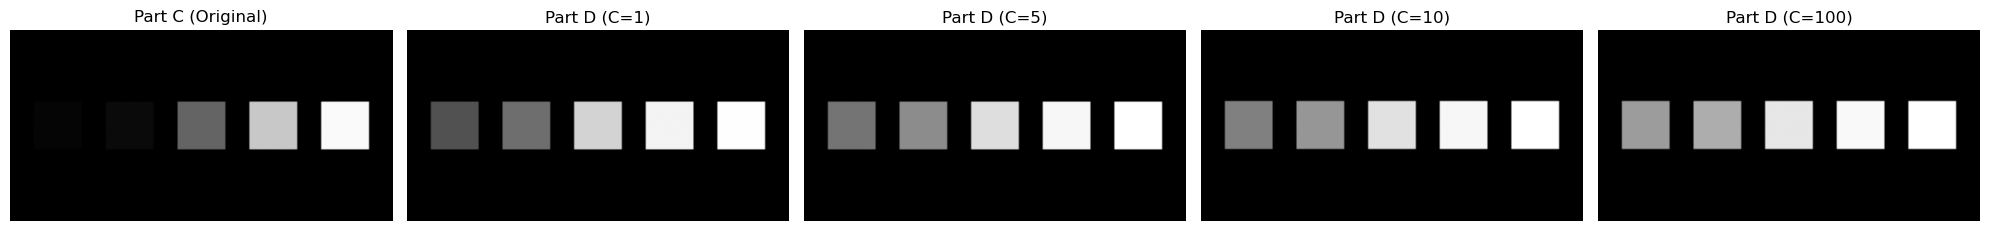


                   MICHELSON CONTRAST ANALYSIS                   
Row \ Patch  |    5    |   10    |   100   |   200   |   250  
--------------------------------------------------------------
Original     |  1.000  |  1.000  |  1.000  |  1.000  |  1.000  | 
C = 1         |  1.000  |  1.000  |  1.000  |  1.000  |  1.000  | 
C = 5         |  1.000  |  1.000  |  1.000  |  1.000  |  1.000  | 
C = 10        |  1.000  |  1.000  |  1.000  |  1.000  |  1.000  | 
C = 100       |  1.000  |  1.000  |  1.000  |  1.000  |  1.000  | 
--------------------------------------------------------------

             NORMALIZED LOG-TRANSFORMED PIXEL VALUES             
Row \ Patch  |    5    |   10    |   100   |   200   |   250  
--------------------------------------------------------------
C = 1         |  82.0   |  110.0  |  212.0  |  244.0  |  254.0  | 
C = 5         |  116.0  |  140.0  |  222.0  |  247.0  |  255.0  | 
C = 10        |  128.0  |  150.0  |  225.0  |  247.0  |  255.0  | 
C = 100       | 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# for displaying and saving
def im_show(img, title="", filename=None):
    plt.figure()
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.title(title)
    plt.axis("off")

    # Save image
    if filename is not None:
        plt.savefig(filename)
        print(f"Saved: {filename}")

    plt.show()

# Part A: Minimum Non-Zero Contrast
rows, cols = 64, 64
imgA = np.full((rows, cols), 127)
imgA[24:40, 24:40] = 128

im_show(
    imgA,
    "Minimum Non-Zero Contrast (127 vs 128)",
    "MinContrast.png"
)

# Part B: Maximum Contrast
imgB = np.full((rows, cols), 0)
imgB[24:40, 24:40] = 255

im_show(
    imgB,
    "Maximum Contrast (0 vs 255)",
    "MaxContrast.png"
)

# Part C: Constant Patches on Zero Background
imgC = np.zeros((80, 160))

vals = [5, 10, 100, 200, 250]
patch = 20
gap = 10
top = 30

# Creating multiple patches of the same size in a loop
for k, v in enumerate(vals):
    left = gap + k * (patch + gap)
    imgC[top:top + patch, left:left + patch] = v

im_show(
    imgC,
    "Patches on Zero Background (5, 10, 100, 200, 250)",
    "Patches.png"
)

# Part D: Log Transformation  s = log(1 + C·I)
def log_transform(img, C):
    I = img.astype(np.float32)
    S = np.log1p(C * I)

    # Normalize
    S = 255 * (S - S.min()) / (S.max() - S.min() + 1e-12)
    return S.astype(np.uint8)

C_list = [1, 5, 10, 100]
log_images = {}  # C -> imgD

for C in C_list:
    imgD = log_transform(imgC, C)
    log_images[C] = imgD

    im_show(
        imgD,
        f"Log Transform: s = log(1 + C·I),  C = {C}",
        f"PartD_Log_C{C}.png"
    )

# Part E
fig, axes = plt.subplots(1, 1 + len(C_list), figsize=(4*(1+len(C_list)), 4))

# original
axes[0].imshow(imgC, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Part C (Original)")
axes[0].axis("off")

# log-transformed images
for i, C in enumerate(C_list, start=1):
    axes[i].imshow(log_images[C], cmap="gray", vmin=0, vmax=255)
    axes[i].set_title(f"Part D (C={C})")
    axes[i].axis("off")

plt.tight_layout()
plt.savefig("vis_score.png")
print("Saved: vis_score.png")
plt.show()

# Michelson Contrast
def michelson_contrast(patch_value, background=0):
    Lmax = patch_value
    Lmin = background
    if (Lmax + Lmin) == 0:
        return 0
    return (Lmax - Lmin) / (Lmax + Lmin)

# analysis
print("\n" + "="*65)
print(f"{'MICHELSON CONTRAST ANALYSIS':^65}")
print("="*65)
header = "{:<12} | ".format("Row \\ Patch") + " | ".join(f"{v:^7}" for v in vals)

print(header)
print("-" * len(header))

# Original
row_orig = f"{'Original':<12} | "
for v in vals:
    cval = michelson_contrast(v, background=0)
    row_orig += f"{cval:^7.3f} | "
print(row_orig)

# Log transformed
for C in C_list:
    row_log = f"C = {C:<9} | "
    for v in vals:
        cval = michelson_contrast(v, background=0)
        row_log += f"{cval:^7.3f} | "
    print(row_log)
print("-" * len(header))

# normalized log transformed values
print("\n" + "="*65)
print(f"{'NORMALIZED LOG-TRANSFORMED PIXEL VALUES':^65}")
print("="*65)
header2 = "{:<12} | ".format("Row \\ Patch") + " | ".join(f"{v:^7}" for v in vals)

print(header2)
print("-" * len(header2))

for C in C_list:
    row_norm = f"C = {C:<9} | "
    imgD = log_images[C]
    for k, v in enumerate(vals):
        left = gap + k * (patch + gap)
        patch_region = imgD[top:top+patch, left:left+patch]
        mean_val = np.mean(patch_region)
        row_norm += f"{mean_val:^7.1f} | "
    print(row_norm)
print("-" * len(header2))

# Problem 3 — Images through Activation Functions (20 points)

For this problem, refer to:
- the **image patches example**
- the **activation functions tutorial**

---

## Part A — Patch Image Creation

Create a grayscale image with:
- zero background
- two constant square patches with intensity values: 5 and 100
  
Display the image and verify the patch intensities.

---

## Part B — ReLU with Bias

Apply a **ReLU activation with a proper bias**:

$$
y = \max(0, x - b)
$$

Choose a bias value **b** such that:
- the lower-brightness patch (value = 5) is eliminated (mapped to 0)
- the higher-brightness patch (value = 100) remains visible

Show the resulting image and briefly explain the effect.

---

## Part C — Sigmoid with Bias

Apply a **Sigmoid activation with a proper bias**:

$$
y = \frac{1}{1 + e^{-k(x - b)}}
$$

Choose bias (and slope if needed) such that:
- the lower-brightness patch is strongly reduced
- the higher-brightness patch remains distinguishable

Show the resulting image and briefly explain the effect.

---

## Notes

- Compare outputs visually.
- Comment briefly on how thresholding behavior differs between:
  - ReLU (hard cutoff)
  - Sigmoid (soft compression).




**Problem 3**

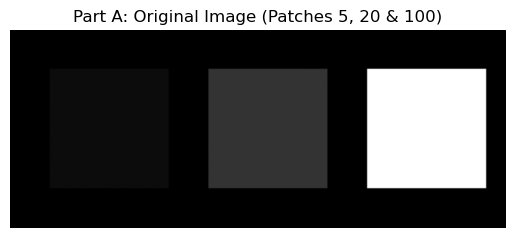

Saved: Problem3_A_Original.png


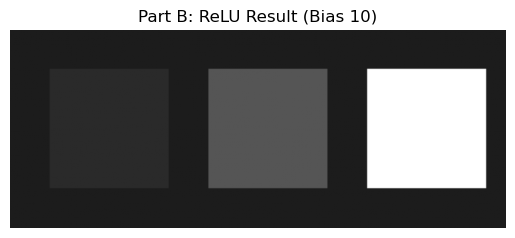

Saved: Problem3_B_ReLU_Bias10.png


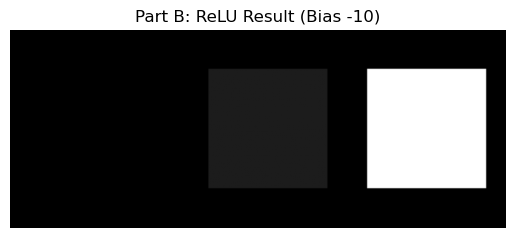

Saved: Problem3_B_ReLU_Bias-10.png


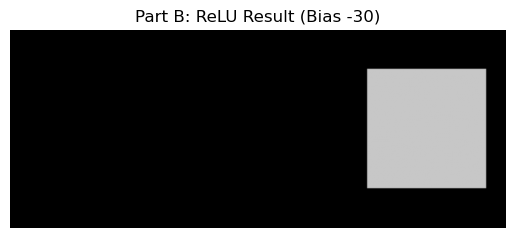

Saved: Problem3_B_ReLU_Bias-30.png


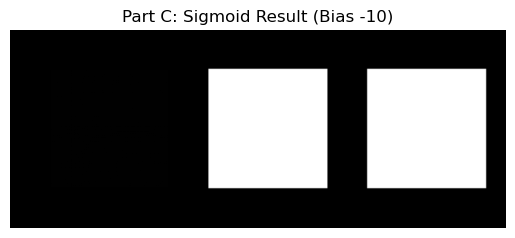

Saved: Problem3_C_Sigmoid_Bias-10.png


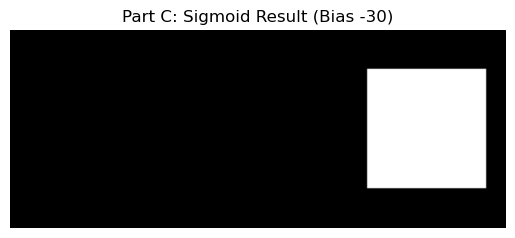

Saved: Problem3_C_Sigmoid_Bias-30.png


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def solve_problem_3():


    # Base Image
    img = np.zeros((100, 250))


    # intensity 5
    img[20:80, 20:80] = 5

    # intensity 20
    img[20:80, 100:160] = 20

    # intensity 100
    img[20:80, 180:240] = 100

    # Save
    plt.figure()
    plt.imshow(img, cmap="gray", vmin=0, vmax=100)
    plt.title("Part A: Original Image (Patches 5, 20 & 100)")
    plt.axis("off")
    plt.savefig("Problem3_A_Original.png", bbox_inches="tight")
    plt.show()
    print("Saved: Problem3_A_Original.png")


    #  ReLU with Proper Bias
    for bias_relu in [10, -10, -30]:
        img_relu = np.maximum(0, img + bias_relu)

        plt.figure()
        plt.imshow(img_relu, cmap="gray", vmin=0, vmax=90)
        plt.title(f"Part B: ReLU Result (Bias {bias_relu})")
        plt.axis("off")

        filename = f"Problem3_B_ReLU_Bias{bias_relu}.png"
        plt.savefig(filename, bbox_inches="tight")

        plt.show()
        print("Saved:", filename)



    # Sigmoid with Proper Bias
    for bias_sig in [ -10, -30]:

        img_sigmoid = 1 / (1 + np.exp(-(img + bias_sig)))

        plt.figure()
        plt.imshow(img_sigmoid, cmap="gray", vmin=0, vmax=1)
        plt.title(f"Part C: Sigmoid Result (Bias {bias_sig})")
        plt.axis("off")

        filename = f"Problem3_C_Sigmoid_Bias{bias_sig}.png"
        plt.savefig(filename, bbox_inches="tight")

        plt.show()
        print("Saved:", filename)




if __name__ == "__main__":
    solve_problem_3()


# Problem 4 — Max Pooling and Downsampling (40 points)

For this problem, refer to the **max pooling example**.

We use the grayscale definitions of **dilation** and **erosion**:

### Grayscale Dilation
$$
O[i,j] = \text{Dilation}(I,S)[i,j] = \max_{(i',j') \in S + (i,j)} I[i',j']
$$

### Grayscale Erosion
$$
O[i,j] = \text{Erosion}(I,S)[i,j] = \min_{(i',j') \in S + (i,j)} I[i',j']
$$

where:
$$
(i',j') \in S + (i,j)
= \{(i',j') \mid (i',j') = (i,j) + (d_1,d_2),\ (d_1,d_2) \in S\}
$$

**Note:** For grayscale morphology, **dilation is equivalent to max pooling without downsampling**.

---

## Part A — Max Pooling + Downsampling Property

Show that max pooling with an $N \times N$ window and stride $N$, followed by $N \times N$ downsampling, preserves the **maximum value** from each original window.

---

## Part B — Test Image Creation

Create a grayscale image with:
- zero background
- a rectangular patch with value **100**
- a smaller rectangular hole inside it with value **0**

---

## Part C — Rolling-Ball Estimate (2×2 Dilation)

Using the **rolling-ball analogy** for dilation, estimate the output of dilating the image with a **2×2 structuring element**.

Show your work using **pencil and paper** (hand derivation / sketch).

---

## Part D — Verification Using Python Max Pooling

Verify the result from Part C by implementing **max pooling** in Python.

---

## Part E — Eliminate the Hole by Increasing Kernel Size

Demonstrate how increasing the max pooling kernel size can eliminate the smaller rectangular hole.

- What is the **minimum square kernel size** needed?
- Derive a mathematical expression for this minimum size in terms of the hole dimensions.

---

## Part F — Hole Disappears During Downsampling (Sketch)

Suppose the hole still appears after max pooling. Sketch a diagram showing how the hole can disappear after the **downsampling step**.

---

## Part G — Max Pooling on the Negated Image vs. Erosion

Suppose the input image is multiplied by **−1**, then max pooling is applied **without downsampling**.

Explain the relationship between the output and applying **erosion** to the original input image.

---

## Part H — Implementing Erosion Using Max Pooling

How can you implement **erosion** using:
- max pooling
- multiplication by a constant

Provide the idea and the formula.


**Problem 4**

Saved: Problem4_B.png


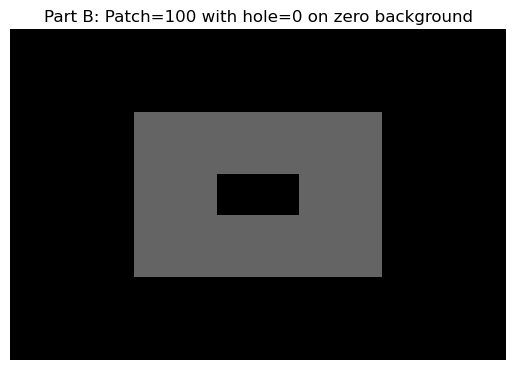

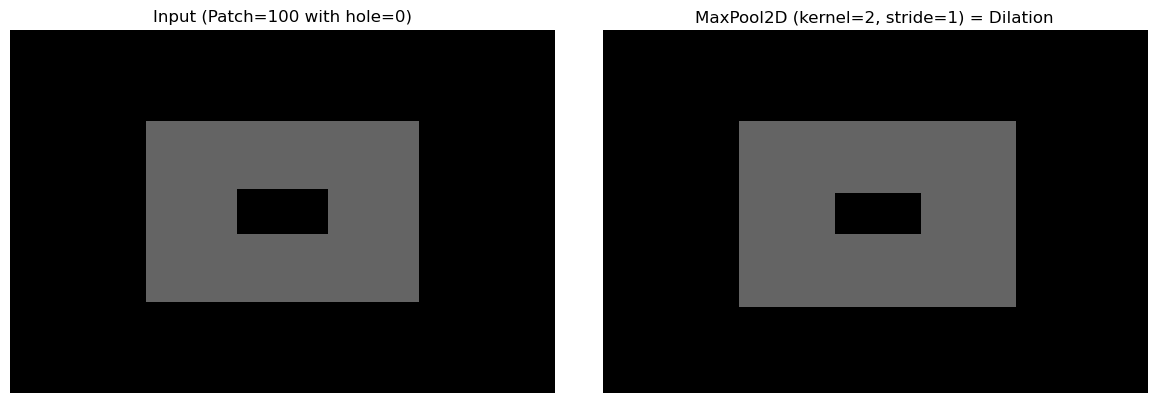

Input shape : torch.Size([1, 1, 80, 120])
Output shape: torch.Size([1, 1, 80, 120])
Hole size before dilation: height=10, width=20
Hole size after dilation (k=2): height=9, width=19


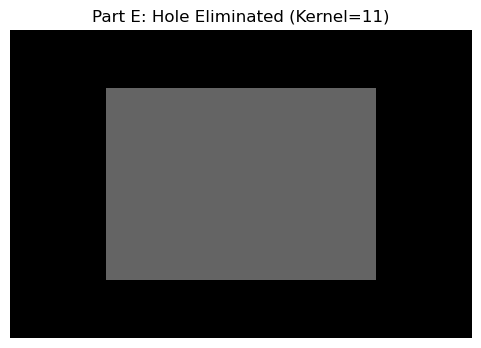

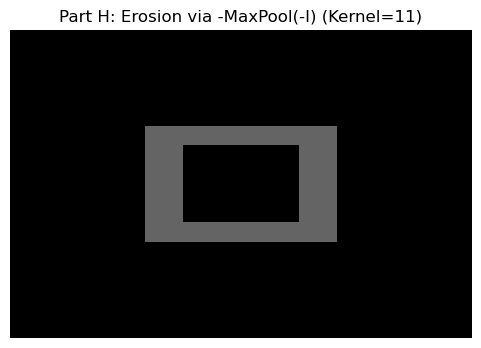

In [4]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Part B
def im_show(img, title="", filename=None):
    plt.figure()
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.title(title)
    plt.axis("off")
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")
        print(f"Saved: {filename}")
    plt.show()


rows, cols = 80, 120
img = np.zeros((rows, cols), dtype=np.float32)

# patch value = 100
img[20:60, 30:90] = 100

# rectangle hole
img[35:45, 50:70] = 0 #h=20, w=10

# Original image
im_show(
    img,
    "Part B: Patch=100 with hole=0 on zero background",
    "Problem4_B.png"
)


patch_r0, patch_r1 = 20, 60
patch_c0, patch_c1 = 30, 90

patch_before = img[patch_r0:patch_r1, patch_c0:patch_c1] #hole size before dialation
mask_before = (patch_before == 0)

rr, cc = np.where(mask_before)
hole_h_before = rr.max() - rr.min() + 1
hole_w_before = cc.max() - cc.min() + 1



# Part D

x = torch.tensor(img).unsqueeze(0).unsqueeze(0)   # shape: (1, 1, H, W)


# pad by 1 pixel on all sides
x_pad = F.pad(x, (1, 1, 1, 1), mode="constant", value=0)

# max pooling (dilation) on padded image
dilated_pad = F.max_pool2d(x_pad, kernel_size=2, stride=1)


H, W = x.shape[-2], x.shape[-1]
dilated = dilated_pad[:, :, 0:H, 0:W]   # now same shape as input

dilated_np = dilated.squeeze().numpy()
patch_after = dilated_np[patch_r0:patch_r1, patch_c0:patch_c1] #hole size before dialation
mask_after = (patch_after == 0)




# Visualization of input vs output

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Input (Patch=100 with hole=0)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(dilated_np, cmap="gray", vmin=0, vmax=255)
plt.title("MaxPool2D (kernel=2, stride=1) = Dilation")
plt.axis("off")

plt.tight_layout()
plt.savefig("Problem4_D.png", bbox_inches="tight")
plt.show()

print("Input shape :", x.shape)
print("Output shape:", dilated.shape)
print(f"Hole size before dilation: height={hole_h_before}, width={hole_w_before}")
if np.any(mask_after):
    rr2, cc2 = np.where(mask_after)
    hole_h_after = rr2.max() - rr2.min() + 1
    hole_w_after = cc2.max() - cc2.min() + 1
    print(f"Hole size after dilation (k=2): height={hole_h_after}, width={hole_w_after}")
else:
    print("Hole size after dilation (k=2): eliminated")


# Part E verification

kernel_size_E = 11
p = kernel_size_E // 2  # 5 for k=11

x_pad_E = F.pad(x, (p, p, p, p), mode="constant", value=0)
dilated_pad_E = F.max_pool2d(x_pad_E, kernel_size=kernel_size_E, stride=1)

H, W = x.shape[-2], x.shape[-1]
dilated_E = dilated_pad_E[:, :, 0:H, 0:W]
dilated_np_E = dilated_E.squeeze().numpy()

#visualization
plt.figure(figsize=(6,4))
plt.imshow(dilated_np_E, cmap="gray", vmin=0, vmax=255)
plt.title(f"Part E: Hole Eliminated (Kernel={kernel_size_E})")
plt.axis("off")
plt.savefig("Problem4_E.png", bbox_inches="tight")
plt.show()

# Part H
# Erode(I) = - MaxPool( -I )
kernel_size_H = 11
pH = kernel_size_H // 2

# converting to torch, applying erosion
x_pad_H = F.pad(-x, (pH, pH, pH, pH), mode="constant", value=0)
eroded_pad = F.max_pool2d(x_pad_H, kernel_size=kernel_size_H, stride=1)
Hh, Wh = x.shape[-2], x.shape[-1]
eroded = -eroded_pad[:, :, 0:Hh, 0:Wh]

eroded_np = eroded.squeeze().numpy()

#visualization
plt.figure(figsize=(6,4))
plt.imshow(eroded_np, cmap="gray", vmin=0, vmax=255)
plt.title(f"Part H: Erosion via -MaxPool(-I) (Kernel={kernel_size_H})")
plt.axis("off")
plt.savefig("Problem4_H.png", bbox_inches="tight")
plt.show()



# Problem 5 - Image Segmentation Using Histograms (40 points)

For this problem, use the image analysis session.

The goal is to adjust histogram-based thresholds to segment different regions in the image.

## Task

Adjust thresholds to detect:

### Part A - The Bear
Choose threshold ranges so the binary mask highlights the bear region.

### Part B - Skin Color (Yellow-like)
Choose threshold ranges so the binary mask highlights the yellow-like skin region.

### Part C - Clothes (Minion)
Choose threshold ranges so the binary mask highlights the clothes region.

## What to Submit

For each of Parts A-C, include screenshots that show:

1. Histograms used to select thresholds
2. Input image
3. Binary mask image
4. Output segmented image


In [2]:
import pathlib

p = pathlib.Path("thresholds2.py")
txt = p.read_text(encoding="utf-8")

txt = txt.replace(
    "from google.colab.patches import cv2_imshow",
    "try:\n    from google.colab.patches import cv2_imshow\nexcept Exception:\n    cv2_imshow = None"
)

p.write_text(txt, encoding="utf-8")
print("Patched thresholds2.py for non-Colab environment.")


Patched thresholds2.py for non-Colab environment.


In [3]:
from AOLMERobots import *


In [4]:
#@title Color threshold{ run: "auto" }
%matplotlib inline
import cv2
import AOLMERobots as gopi
from thresholds2 import *
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt


image = cv2.imread('Bob.jpg')
height, width = image.shape[:2]
image= cv2.resize(image, (int(320/height*width), 320))

thr_obj = threshold(image)



def DisplayData(redLow, redHigh, greenLow, greenHigh, blueLow, blueHigh):

  img = image.copy()

  # Red component processing:
  thr_obj.sel_color_comp ('red')
  RedRange =  thr_obj.ThreshRange (redLow , redHigh)
  #RedLow   =  thr_obj.ThreshLow   (redLow)
  #RedHi    =  thr_obj.ThreshHigh  (redHi)


  # Green component processing:
  thr_obj.sel_color_comp ('green')
  GreenRange =  thr_obj.ThreshRange (greenLow , greenHigh)
  #GreenLow   =  thr_obj.ThreshLow   (greenLow)
  #GreenHi    =  thr_obj.ThreshHigh  (greenHi)


  # Blue component processing:
  thr_obj.sel_color_comp ('blue')
  BlueRange =  thr_obj.ThreshRange (blueLow , blueHigh)
  #BlueLow   =  thr_obj.ThreshLow   (blueLow)
  #BlueHi    =  thr_obj.ThreshHigh  (blueHi)

  # Get middle-RGB combination
  comb_image, comb_allTh= thr_combination(img, BlueRange,GreenRange, RedRange).return_result()
  area = sum(comb_allTh)


  skip = 70
  # Generate the second window, including 9 single color images, one combination image, and text
  white = np.zeros((image.shape[0], skip), np.uint8)
  white[:] = (255)
  white_3_channel = cv2.merge((white, white, white))

  comb_allTh_3_channel = cv2.merge((comb_allTh*255, comb_allTh*255, comb_allTh*255))
  row_1 = np.hstack((img, white_3_channel))
  row_2 = np.hstack((row_1, comb_allTh_3_channel))
  row_3 = np.hstack((row_2, white_3_channel))
  row_4 = np.hstack((row_3, comb_image))



  white_title = np.zeros((50, row_4.shape[1]), np.uint8)
  white_title[:] = (255)
  white_title_3_channel = cv2.merge((white_title, white_title, white_title))

  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(white_title_3_channel, 'Input', (120,40), font, 0.7, (0,0,0), 2, 0)
  cv2.putText(white_title_3_channel, 'Binary Image', (120+image.shape[0]+skip,40), font, 0.7, (0,0,0), 2, 0)
  cv2.putText(white_title_3_channel, 'Output', (180+image.shape[0]*2+skip*2,40), font, 0.7, (0,0,0), 2, 0)
  all = np.vstack((white_title_3_channel, row_4))

  cv2_imshow(all)


  rgb_values = [blueLow, blueHigh, greenLow, greenHigh, redLow, redHigh]

  # Show histograms for RGB color
  gopi.show_RGB_hist(img, rgb_values)
  print('The detected color region has {} pixels'.format(int(area)))

  #print(redLow,'<= Red   <= ', redHigh)
  #print(greenLow,'<= Green <= ', greenHigh)
  #print(blueLow,'<= Blue  <= ', blueHigh)




interactive_plot = interactive(DisplayData,
                               redLow   = widgets.IntSlider(min=0, max=255, step=1, value=16),
                               redHigh  = widgets.IntSlider(min=0, max=255, step=1, value=156),
                               greenLow = widgets.IntSlider(min=0, max=255, step=1, value=30),
                               greenHigh= widgets.IntSlider(min=0, max=255, step=1, value=132),
                               blueLow  = widgets.IntSlider(min=0, max=255, step=1, value=24),
                               blueHigh = widgets.IntSlider(min=0, max=255, step=1, value=180))



In [ ]:
interactive_plot

# Problem 6 — Video Creation (40 points)

For this problem, use the **video creation tutorial** and the provided **video template**.

Construct a fun short video that satisfies the following requirements.

---

## Requirements

### Part A — Frame Construction Using NumPy
- The video must be created using **NumPy arrays**
- Number of frames must be:

$$
10 \le \text{frames} \le 30
$$

- Each frame should be generated programmatically (not imported images)

---

### Part B — Moving Objects

The video must contain:
- Two small objects
- Both objects must **move across frames**
- Motion can be:
  - linear
  - diagonal
  - circular
  - bouncing
  - or any creative pattern

---

## Implementation Plan

1. Define frame size (rows, columns)
2. Create empty NumPy frame arrays
3. Draw two small objects (patches or shapes)
4. Update their positions each frame
5. Store frames in a list
6. Export frames to a video file using the tutorial method

---

## Output Requirements

Submit:

- Final generated video file
- PDF printout of the Jupyter notebook used to create the video

---

## Notes

- Frames should be visually clear
- Object motion should be observable
- Keep object size small relative to frame
- Background can remain constant or vary


**Problem 6**

In [16]:
import urllib.request
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/pattichis/AIML/main/AOLME.py",
    "AOLME.py"
)


('AOLME.py', <http.client.HTTPMessage at 0x1db0e3c4c50>)

In [17]:
import pathlib

p = pathlib.Path("AOLME.py")
txt = p.read_text(encoding="utf-8")

txt = txt.replace(
    "from google.colab.patches import cv2_imshow",
    "try:\n    from google.colab.patches import cv2_imshow  # Colab only\nexcept Exception:\n    cv2_imshow = None"
)

p.write_text(txt, encoding="utf-8")
print("Patched AOLME.py to work outside Colab.")


Patched AOLME.py to work outside Colab.


In [8]:
import pathlib

p = pathlib.Path("AOLME.py")
txt = p.read_text(encoding="utf-8")

txt = txt.replace(
    "from google.colab.patches import cv2_imshow",
    "try:\n    from google.colab.patches import cv2_imshow  # Colab only\nexcept Exception:\n    cv2_imshow = None"
)

p.write_text(txt, encoding="utf-8")
print("Patched AOLME.py to work outside Colab.")


Patched AOLME.py to work outside Colab.


In [1]:
from AOLME import *
!pip install imageio

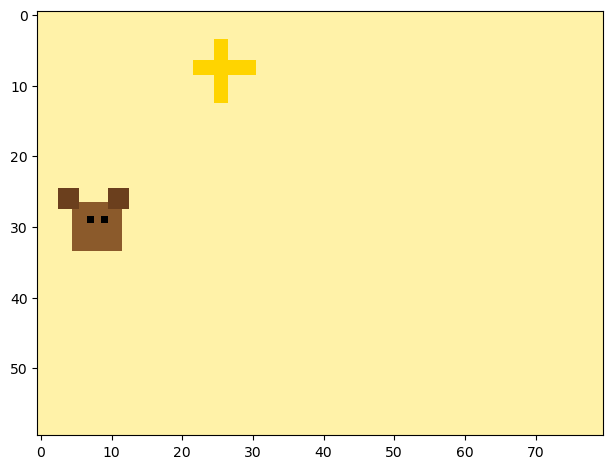

<Figure size 640x480 with 0 Axes>

In [20]:
from AOLME import *
import numpy as np
from IPython.display import HTML


# Video setup

rows, cols = 60, 80
num_frames = 20
fps = 6

# Colors (hex RGB)
butter = "fff2a8"   # butter yellow background
bear   = "8b5a2b"   # brown teddy
bear2  = "6b3f1d"   # darker brown details
banana = "ffd400"   # banana yellow
black  = "000000"   # eyes


# Helpers: draw objects

def draw_teddy(frame, cx, cy):
    """
    Simple teddy icon: head: 7x7 square, ears: two 3x3 squares, eyes: 1-pixel dots
    """
    # head
    y0, y1 = max(0, cy-3), min(rows, cy+4)
    x0, x1 = max(0, cx-3), min(cols, cx+4)
    frame[y0:y1, x0:x1] = bear

    # ears
    frame[max(0, cy-5):min(rows, cy-2), max(0, cx-5):min(cols, cx-2)] = bear2
    frame[max(0, cy-5):min(rows, cy-2), max(0, cx+2):min(cols, cx+5)] = bear2

    # eyes
    ey = cy-1
    for ex in (cx-1, cx+1):
        if 0 <= ey < rows and 0 <= ex < cols:
            frame[ey, ex] = black

# Banana drawn like a plus sign:vertical stroke + horizontal stroke, thickness controls how fat the plus looks
def draw_banana_plus(frame, cx, cy, arm=4, thickness=2, color=banana):

    # vertical stroke
    y0, y1 = max(0, cy-arm), min(rows, cy+arm+1)
    for dx in range(-(thickness//2), thickness - (thickness//2)):
        x = cx + dx
        if 0 <= x < cols:
            frame[y0:y1, x] = color

    # horizontal stroke
    x0, x1 = max(0, cx-arm), min(cols, cx+arm+1)
    for dy in range(-(thickness//2), thickness - (thickness//2)):
        y = cy + dy
        if 0 <= y < rows:
            frame[y, x0:x1] = color

# Build frames

frame_list = []

# Teddy moves left to right
teddy_y = rows // 2
teddy_x_start, teddy_x_end = 8, cols - 9

# Banana-plus moves top to bottom with wiggle
banana_y_start, banana_y_end = 8, rows - 9
banana_x_base = cols // 3
wiggle_amp = 8  # how far it wiggles left-right

# teddy bounces vertically like a sine wave
teddy_bounce_amp = 10  # bounce height in pixels

for t in range(num_frames):
    frame = np.full((rows, cols), butter)

    # Teddy position (linear motion and sine-wave bounce)
    teddy_x = int(teddy_x_start + (teddy_x_end - teddy_x_start) * t / (num_frames - 1))
    bounce = int(teddy_bounce_amp * np.sin(2 * np.pi * t / (num_frames - 1)))
    teddy_y_bounce = int(np.clip(teddy_y + bounce, 6, rows - 7))
    draw_teddy(frame, teddy_x, teddy_y_bounce)

    # Banana-plus position (downward motion and sine wiggle)
    banana_y = int(banana_y_start + (banana_y_end - banana_y_start) * t / (num_frames - 1))
    wiggle = int(wiggle_amp * np.sin(2 * np.pi * t / (num_frames - 1)))
    banana_x = int(np.clip(banana_x_base + wiggle, 6, cols - 7))
    draw_banana_plus(frame, banana_x, banana_y, arm=4, thickness=2, color=banana)

    frame_list.append(frame)


# Play video

play_video = vid_show(frame_list, fps)
HTML(play_video.to_html5_video())


